# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?
Answer:
The lowest price for a coach ticket was $45 and the highest $594. On average one had to pay $376.59 for a coach ticket while the priciest 25% is more than $425.68. Therefore $500 is a very high price to pay for a coach ticket.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flights = pd.read_csv("flight.csv")
# print(flights.head())

## Task 1
print(flights.describe(include = "all"))


                miles     passengers          delay inflight_meal  \
count   129780.000000  129780.000000  129780.000000        129780   
unique            NaN            NaN            NaN             2   
top               NaN            NaN            NaN            No   
freq              NaN            NaN            NaN         90813   
mean      2006.224696     207.723155      13.162845           NaN   
std        943.034768      12.776363      41.941680           NaN   
min         12.000000     135.000000       0.000000           NaN   
25%       1343.000000     204.000000       9.000000           NaN   
50%       1986.000000     210.000000      10.000000           NaN   
75%       2468.000000     215.000000      13.000000           NaN   
max       4548.000000     244.000000    1560.000000           NaN   

       inflight_entertainment inflight_wifi day_of_week  redeye weekend  \
count                  129780        129780      129780  129780  129780   
unique               

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

Answer:
The minimum are $170, the maximum $594 and the mean $432. The most expensive 25% had to pay above $480 for their ticket. Therefore paying $500 for an 8 hour flight seems a lot more reasonable.

In [6]:
## Task 2
over8 = flights[flights.hours >= 8]
print(over8.describe(include = "all"))


              miles   passengers        delay inflight_meal  \
count   2634.000000  2634.000000  2634.000000          2634   
unique          NaN          NaN          NaN             2   
top             NaN          NaN          NaN            No   
freq            NaN          NaN          NaN          1826   
mean    4207.205771   207.270691    14.167426           NaN   
std       69.083475    13.098447    57.863457           NaN   
min     4125.000000   148.000000     0.000000           NaN   
25%     4154.000000   203.000000     9.000000           NaN   
50%     4190.000000   209.000000    10.000000           NaN   
75%     4243.000000   215.000000    13.000000           NaN   
max     4548.000000   233.000000  1509.000000           NaN   

       inflight_entertainment inflight_wifi day_of_week redeye weekend  \
count                    2634          2634        2634   2634    2634   
unique                      2             2           7      2       2   
top                  

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

Answer: The absolute majority of flights have a maximum delay of 50 minutes with the majority of that being below 15 minutes and a small spike till 40 minutes.
Therefore choosing the save option you should calculate with a 40 minute delay or more risky with a 15 minute delay.

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64


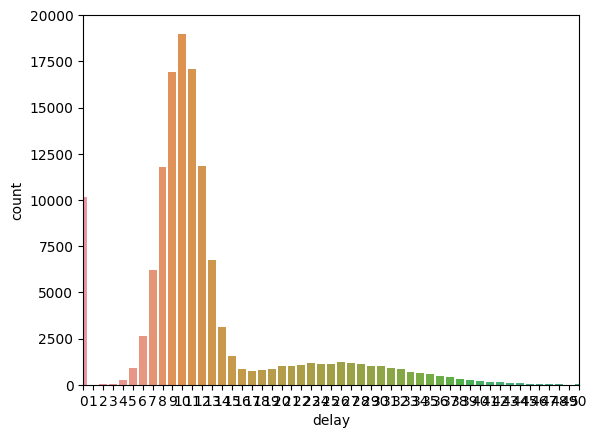

<Figure size 640x480 with 0 Axes>

In [17]:
## Task 3
print(flights.delay.describe())
sns.countplot(x = "delay", data = flights)
plt.axis([0,50,0,20000])
plt.show()
plt.clf()

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

Considering the correlation of 0.76, there is a decently strong correlation between the two with first class prices being higher when coach prices are higher.
There seems to be another variable, however, which splits the data into two connected ellipses.

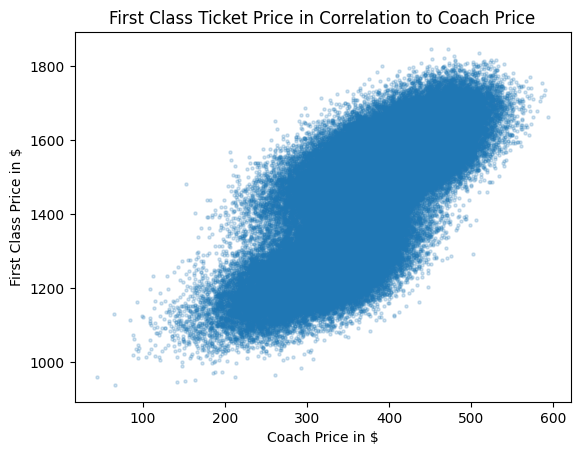

Correlaion of: 0.7587565939365981


<Figure size 640x480 with 0 Axes>

In [27]:
## Task 4
plt.scatter(flights.coach_price, flights.firstclass_price, alpha = 0.2, s = 5)

plt.title("First Class Ticket Price in Correlation to Coach Price")
plt.xlabel("Coach Price in $")
plt.ylabel("First Class Price in $")
plt.show()
plt.clf()
print("Correlation of:", flights["coach_price"].corr(flights["firstclass_price"]))

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

While Entertainment and Wifi make an average difference of about $70, a meal only makes a difference of $20.

C:\Users\lasse\AppData\Local\Temp\ipykernel_17364\1201070560.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl1.set_xticklabels(["Yes", "No"])
C:\Users\lasse\AppData\Local\Temp\ipykernel_17364\1201070560.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl2.set_xticklabels(["Yes", "No"])
C:\Users\lasse\AppData\Local\Temp\ipykernel_17364\1201070560.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl2.set_xticklabels(["Yes", "No"])


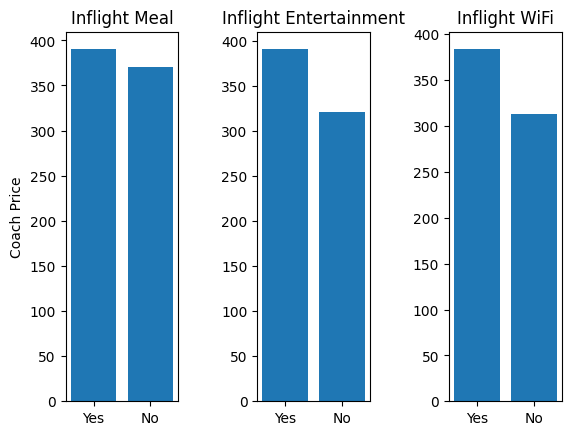

Mean price difference between inflight meal, entertainment and wifi are: 19.31352129718823 70.06515472358234 70.46574876514734


<Figure size 640x480 with 0 Axes>

In [44]:
## Task 5
y_inflight_meal = flights.coach_price[flights.inflight_meal == "Yes"]
n_inflight_meal = flights.coach_price[flights.inflight_meal == "No"]
y_inflight_entertainment = flights.coach_price[flights.inflight_entertainment == "Yes"]
n_inflight_entertainment = flights.coach_price[flights.inflight_entertainment == "No"]
y_inflight_wifi = flights.coach_price[flights.inflight_wifi == "Yes"]
n_inflight_wifi = flights.coach_price[flights.inflight_wifi == "No"]

pl1 = plt.subplot(1, 3, 1)
pl1.set_xticklabels(["Yes", "No"])
pl1.set_ylabel("Coach Price")
pl1.bar(["Yes", "No"], [y_inflight_meal.mean(), n_inflight_meal.mean()])
plt.title("Inflight Meal")
pl2 = plt.subplot(1, 3, 2)
pl2.set_xticklabels(["Yes", "No"])
pl2.bar(["Yes", "No"], [y_inflight_entertainment.mean(), n_inflight_entertainment.mean()])
plt.title("Inflight Entertainment")
pl2 = plt.subplot(1, 3, 3)
pl2.set_xticklabels(["Yes", "No"])
pl2.bar(["Yes", "No"], [y_inflight_wifi.mean(), n_inflight_wifi.mean()])
plt.title("Inflight WiFi")
plt.subplots_adjust(wspace = 0.7)

plt.show()
plt.clf()
print("Mean price difference between inflight meal, entertainment and wifi are:", y_inflight_meal.mean() - n_inflight_meal.mean(), y_inflight_entertainment.mean() - n_inflight_entertainment.mean(), y_inflight_wifi.mean() - n_inflight_wifi.mean())

6. How does the number of passengers change in relation to the length of flights?

The number of passengers doesn't seem to relate to the amount of miles flown. The only thing becoming clear from the data is that there is a pattern of flights around 800, 2000 and 4000 miles that repeats for two sizes of aircraft around 165 and 210 passengers.

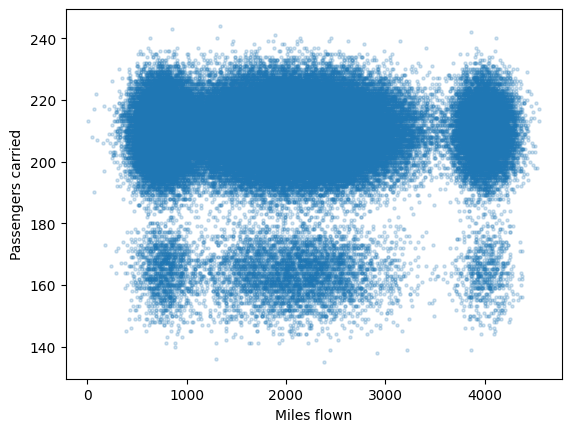

<Figure size 640x480 with 0 Axes>

In [48]:
## Task 6
plt.scatter(flights.miles, flights.passengers, alpha = 0.2, s = 5)

plt.xlabel("Miles flown")
plt.ylabel("Passengers carried")
plt.show()
plt.clf()

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

The average coach price on weekends is around $100 more expensive with the first class price also being higher from the start and rising more quickly with the coach price.

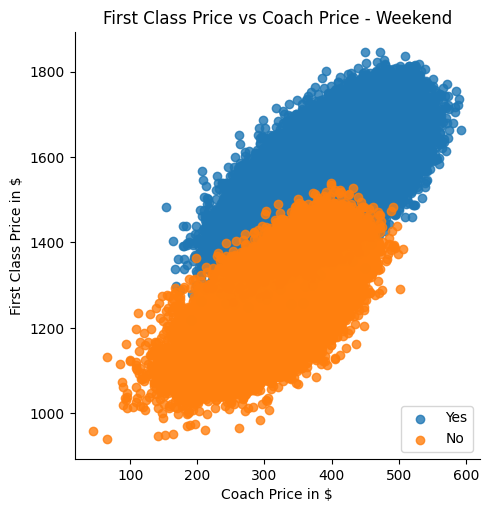

<Figure size 640x480 with 0 Axes>

In [63]:
## Task 7
weekdays = flights[flights.weekend == "No"]
weekend = flights[flights.weekend == "Yes"]

sns.lmplot(x = "coach_price", y = "firstclass_price", data = flights, fit_reg = False, hue = "weekend", legend = False)
plt.legend(loc = "lower right")
plt.title("First Class Price vs Coach Price - Weekend")
plt.xlabel("Coach Price in $")
plt.ylabel("First Class Price in $")

plt.show()
plt.clf()


8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

On weekdays night flights are reliably about $65 cheaper while it's more around $80 on friday and weekends.

    miles  passengers  delay inflight_meal inflight_entertainment  \
0     792         172      0            No                    Yes   
14   1987         162      0           Yes                    Yes   
58   1034         177      0            No                    Yes   
80    882         172      0           Yes                    Yes   
89   3854         149      0            No                     No   

   inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0            Yes      Sunday    Yes     Yes      338.820           1571.02   
14           Yes    Saturday    Yes     Yes      357.335           1571.88   
58            No    Saturday    Yes     Yes      268.700           1431.57   
80           Yes    Thursday    Yes      No      297.100           1239.53   
89           Yes      Friday    Yes     Yes      291.920           1487.35   

    hours  
0       1  
14      4  
58      2  
80      2  
89      7  


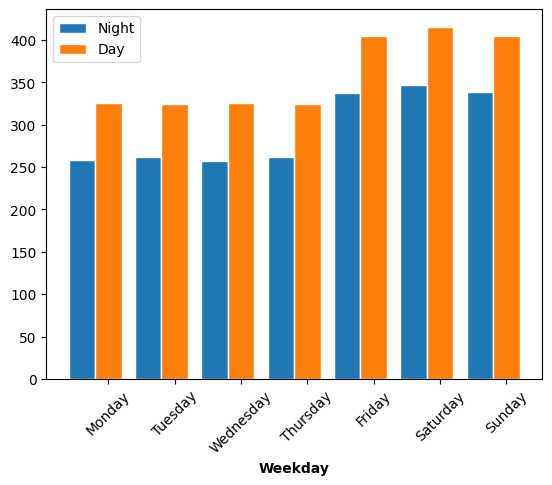

<Figure size 640x480 with 0 Axes>

In [69]:
## Task 8
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
barWidth = 0.4
y_redeye = flights[flights.redeye == "Yes"]
n_redeye = flights[flights.redeye == "No"]
print(y_redeye.head())
y_redeye_mean = [y_redeye.coach_price[y_redeye.day_of_week == days[0]].mean(), y_redeye.coach_price[y_redeye.day_of_week == days[1]].mean(), y_redeye.coach_price[y_redeye.day_of_week == days[2]].mean(), y_redeye.coach_price[y_redeye.day_of_week == days[3]].mean(), y_redeye.coach_price[y_redeye.day_of_week == days[4]].mean(), y_redeye.coach_price[y_redeye.day_of_week == days[5]].mean(), y_redeye.coach_price[y_redeye.day_of_week == days[6]].mean()]
n_redeye_mean = [n_redeye.coach_price[n_redeye.day_of_week == days[0]].mean(), n_redeye.coach_price[n_redeye.day_of_week == days[1]].mean(), n_redeye.coach_price[n_redeye.day_of_week == days[2]].mean(), n_redeye.coach_price[n_redeye.day_of_week == days[3]].mean(), n_redeye.coach_price[n_redeye.day_of_week == days[4]].mean(), n_redeye.coach_price[n_redeye.day_of_week == days[5]].mean(), n_redeye.coach_price[n_redeye.day_of_week == days[6]].mean()]

r1 = np.arange(len(y_redeye_mean))
r2 = [x + barWidth for x in r1]

plt.bar(r1, y_redeye_mean, width = barWidth, edgecolor = "white", label = "Night")
plt.bar(r2, n_redeye_mean, width = barWidth, edgecolor = "white", label = "Day")

plt.xlabel("Weekday", fontweight = "bold")
plt.xticks([r + barWidth for r in range(len(y_redeye_mean))], days, rotation = 45)

plt.legend()
plt.show()
plt.clf()